In [54]:
from mintpy.utils import *
import mintpy.utils as mpu
import mintpy.utils.readfile
import mintpy.utils.utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [55]:
sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper")
# sns.set_theme(style="white") #, font_scale=0.5)
plt.style.use(['seaborn-paper', 'seaborn-ticks'])
sns.set_color_codes()

In [56]:
matplotlib.rcParams['lines.linewidth']
matplotlib.rcParams['axes.linewidth']
plt.style.available
matplotlib.use("pgf")
matplotlib.rcParams.update({    
    'font.family': 'serif',
    'font.serif': [],       # use latex default serif font
    'font.sans-serif': [],  # use a specific sans-serif font
    'font.monospace': [],   # use a specific sans-serif font
    'text.usetex': True,
    'pgf.rcfonts': False,
    'pgf.texsystem': 'pdflatex',
    'lines.linewidth': 0.7,
    'axes.linewidth': 0.6,
    'axes.unicode_minus': False
})

golden_ratio = (5**.5 - 1) / 2

width  = 3.48761
height = width*golden_ratio
print(width,height)

3.48761 2.155461519504021


In [57]:
mask_data, mask_attr = mpu.readfile.read('/data1/data/sar_jhb_dumps/mintpy/maskROI.h5')

In [58]:
mask_attr

{'ALOOKS': '2',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '35.246762617962254',
 'CENTER_LINE_UTC': '60414.0',
 'DATA_TYPE': 'bool',
 'DATE12': '20171102_20201228',
 'EARTH_RADIUS': '6372916.232867104',
 'END_DATE': '20201228',
 'FILE_LENGTH': '2785',
 'LENGTH': '36',
 'FILE_PATH': '/data1/data/sar_jhb_dumps/mintpy/maskROI.h5',
 'FILE_TYPE': 'mask',
 'HEADING': '-1.260372609972952e+01',
 'HEIGHT': '707266.2511479785',
 'INCIDENCE_ANGLE': '3.901818002255490e+01',
 'LAT_REF1': '-26.6842879645658',
 'LAT_REF2': '-26.4644430053711',
 'LAT_REF3': '-26.35441583861653',
 'LAT_REF4': '-26.13532301691702',
 'LONG_REF1': '27.21457286093934',
 'LONG_REF2': '28.13658642471043',
 'LONG_REF3': '27.12070330797209',
 'LONG_REF4': '28.04000415979327',
 'ORBIT_DIRECTION': 'ASCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '38.81139373779297',
 'P_BASELINE_TOP_HDR': '38.81139373779297',
 'RANGE_PIXEL_SIZE': '30.7259

In [59]:
plt.imshow(mask_data)

In [60]:
mask_data_temp, mask_attr_temp = mpu.readfile.read('/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/maskTempCoh.h5')
plt.imshow(mask_data_temp)

In [61]:
plt.imshow(mask_data*mask_data_temp)
mask_data = mask_data*mask_data_temp

In [62]:
ts_file = '/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5'

In [63]:
ts_data, ts_attr = mpu.readfile.read(ts_file)

In [64]:
from mintpy.objects import (
    geometryDatasetNames,
    geometry,
    ifgramStack,
    timeseries,
)
from mintpy.utils import ptime, readfile

In [65]:
obj = timeseries(ts_file)

In [66]:
dates, dis = mpu.utils.read_timeseries_yx(0,0, ts_file=ts_file)

input y / x: 0 / 0


In [67]:
ts_attr

{'ALOOKS': '2',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '35.246762617962254',
 'CENTER_LINE_UTC': '60414.0',
 'DATA_TYPE': 'float32',
 'DATE12': '171102-180101',
 'EARTH_RADIUS': '6372916.232867104',
 'END_DATE': '20201228',
 'FILE_LENGTH': '2785',
 'LENGTH': '36',
 'FILE_PATH': '/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5',
 'FILE_TYPE': 'timeseries',
 'HEADING': '-1.260372609972952e+01',
 'HEIGHT': '707266.2511479785',
 'INCIDENCE_ANGLE': '3.901818002255490e+01',
 'LAT_REF1': '-26.6842879645658',
 'LAT_REF2': '-26.4644430053711',
 'LAT_REF3': '-26.35441583861653',
 'LAT_REF4': '-26.13532301691702',
 'LONG_REF1': '27.21457286093934',
 'LONG_REF2': '28.13658642471043',
 'LONG_REF3': '27.12070330797209',
 'LONG_REF4': '28.04000415979327',
 'ORBIT_DIRECTION': 'ASCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '38.81139373779297',
 'P_BASELINE_TOP_HDR': '38.811393

In [68]:
plt.imshow(ts_data[1]*mask_data);

In [69]:
ts_cum_sum = (ts_data*mask_data).sum(axis=(1,2))
ts_cum_sum.shape

(96,)

In [70]:
df_ts_data = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(dates))

In [71]:
df_ts_data = df_ts_data.resample('12D').mean().rename(columns=lambda x: 'Displacement')

In [72]:
a = open('/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/exclude_date.txt').readlines()
a

['20171126\n',
 '20180206\n',
 '20180419\n',
 '20190321\n',
 '20190414\n',
 '20191128\n']

In [73]:
df_ts_data['Count'] = 1

In [74]:
for i in a:    
    df_ts_data.loc[i[:8]:i[:8]] = 0

In [75]:
df_ts_data['Days'] = 1

In [76]:
df_ts_data.Displacement *= 365
df_ts_data.Displacement /= 12

In [77]:
df_ts_B = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(dates))
for i in a:    
    df_ts_B.loc[i[:8]:i[:8]] = None
df_ts_B  = df_ts_B['2018-01-01':]
df_ts_B.Displacement *= 365
df_ts_B.Displacement /= 12

In [78]:
df_ts_Q = df_ts_data.resample('D').last()
df_ts_Q = df_ts_Q.bfill(limit=11) \
                 .resample('Q') \
                 .sum()['2018-01-01':]
df_ts_Q['Velocity'] = df_ts_Q.Displacement/df_ts_Q.Count
df_ts_Q['Adj_Displacement'] = df_ts_Q.Velocity*df_ts_Q.Days
# df_ts_Q.Velocity -= df_ts_Q.Velocity.iloc[0]
df_ts_Q['Acceleration'] = df_ts_Q.Velocity.diff()
df_ts_Q

,Displacement,Count,Days,Velocity,Adj_Displacement,Acceleration
2018-03-31,2509.176270,78.0,90.0,32.168927,2895.203388,NaN
2018-06-30,3795.999023,79.0,91.0,48.050621,4372.606470,15.881694
2018-09-30,4964.965332,92.0,92.0,53.967014,4964.965332,5.916394
2018-12-31,6600.517090,92.0,92.0,71.744751,6600.517090,17.777736
2019-03-31,6610.978027,78.0,90.0,84.756129,7628.051570,13.011378
2019-06-30,8350.718750,79.0,91.0,105.705301,9619.182358,20.949172
2019-09-30,11481.946289,92.0,92.0,124.803764,11481.946289,19.098463
2019-12-31,11547.029297,80.0,92.0,144.337866,13279.083691,19.534102
2020-03-31,14171.068359,91.0,91.0,155.726026,14171.068359,11.388160
2020-06-30,17144.521484,91.0,91.0,188.401335,17144.521484,32.675309


In [79]:
df_ts_M = df_ts_data.resample('D').last()
df_ts_M = df_ts_M.bfill(limit=11) \
                 .resample('M') \
                 .sum()['2018-01-01':]
df_ts_M['Velocity'] = df_ts_M.Displacement/df_ts_M.Count
df_ts_M['Adj_Displacement'] = df_ts_M.Velocity*df_ts_M.Days
# df_ts_M.Velocity -= df_ts_M.Velocity.iloc[0]
df_ts_M['Acceleration'] = df_ts_M.Velocity.diff()
df_ts_M

,Displacement,Count,Days,Velocity,Adj_Displacement,Acceleration
2018-01-31,210.211700,25.0,31.0,8.408468,260.662509,NaN
2018-02-28,790.890747,22.0,28.0,35.949579,1006.588224,27.541111
2018-03-31,1508.073975,31.0,31.0,48.647548,1508.073975,12.697968
2018-04-30,966.445374,18.0,30.0,53.691410,1610.742289,5.043862
2018-05-31,1445.090454,31.0,31.0,46.615821,1445.090454,-7.075589
2018-06-30,1384.463257,30.0,30.0,46.148775,1384.463257,-0.467046
2018-07-31,1725.030884,31.0,31.0,55.646158,1725.030884,9.497382
2018-08-31,1865.620605,31.0,31.0,60.181310,1865.620605,4.535152
2018-09-30,1374.314087,30.0,30.0,45.810470,1374.314087,-14.370840
2018-10-31,2091.285645,31.0,31.0,67.460827,2091.285645,21.650358


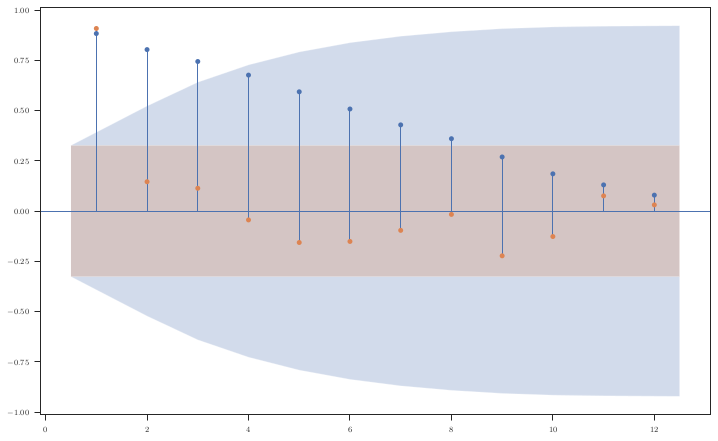

In [105]:
fig = plt.figure(figsize=(12,7.5))
ax = fig.subplots()
plot_acf(df_ts_M.Velocity, zero=False, ax=ax, lags=12)
plot_pacf(df_ts_M.Velocity, zero=False, ax=ax, lags=12)
ax.set_title(None)
fig

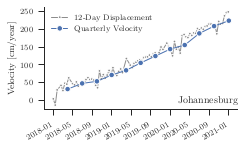

In [103]:
fig = plt.figure(figsize=(width,height))
ax1 = fig.subplots()
sns.lineplot(data=df_ts_B.Displacement, marker='.', color='C7', ax=ax1);
sns.lineplot(data=df_ts_Q.Velocity, marker='o', color='C0', ax=ax1)
ax1.set_ylabel(r'Velocity [cm/year]')
# ax1.set_ylabel(None)
plt.legend(ax1.lines,["12-Day Displacement"]+["Quarterly Velocity"], loc='upper left')
sns.despine(right=True, trim=False)
fig.autofmt_xdate()
ax1.text(1.0,0.05,'Johannesburg',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax1.transAxes)
fig.tight_layout()
fig.savefig("pgf/jhb_displacement_velocity.pgf", backend='pgf', dpi=600)
fig

In [82]:
stringency = pd.read_csv("/data1/data/stringency_index.csv", index_col=1, parse_dates=True, )
stringency = stringency.T
stringency = stringency[2:] 
stringency.index = pd.DatetimeIndex(stringency.index)

In [83]:
STR = stringency['ZAF'].astype(float)
df_ts_Q['Stringency'] = STR.resample('Q') \
                           .mean()['2018-01-01':] 
df_ts_Q['Stringency'].fillna(0, inplace=True)

In [84]:
df_ts_M['Stringency'] = STR.resample('M') \
                           .mean()['2018-01-01':] 
df_ts_M['Stringency'].fillna(0, inplace=True)

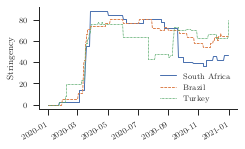

In [106]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=stringency[['ZAF','BRA','TUR']].astype(float).loc[:'2020-12-31'])
ax1.set_ylabel(r'Stringency')
plt.legend(["South Africa","Brazil","Turkey"], loc='lower right')
sns.despine(right=True, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/stringency.pgf", backend='pgf', dpi=600)
fig

In [86]:
country = "South Africa Seasonal"
GDP = pd.read_csv("/data1/data/GDP.csv" )
GDP.index = pd.DatetimeIndex(GDP.Date)
GDP = GDP.resample('Q').max()
df_ts_Q.loc[:, "GDP"] = GDP[country]

GDP_M = (GDP[country]).resample('M').last()
GDP_M['2020-10-31'] = np.NaN
GDP_M['2020-11-30'] = np.NaN
GDP_M['2020-12-31'] = np.NaN

GDP_Q = GDP[country]

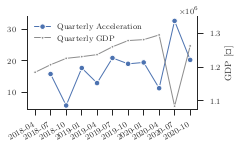

In [87]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Acceleration.loc[:'2020-09-30'], marker='o', color='C0');
# ax1.set_ylabel(r'Acceleration [cm/year\textsuperscript{2}]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
ax2.set_ylabel(r'GDP [\textcurrency]')
# ax2.set_ylabel(None)
ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Acceleration"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_acceleration.pgf", backend='pgf', dpi=600)
fig

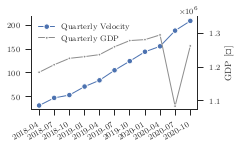

In [88]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Velocity.loc[:'2020-09-30'], marker='o', color='C0')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
# ax1.set_ylim(bottom=0)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Velocity"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_velocity_GDP.pgf", backend='pgf', dpi=600)
fig

In [89]:
df_ts_M['GDP_naive']      = (df_ts_Q.GDP).resample('M').last()
df_ts_M.GDP_naive         =  df_ts_M.GDP_naive.bfill()
df_ts_M['GDP'] = GDP_M.reset_index() \
                      .interpolate(method='spline', order=3) \
                      .set_index('Date') \
                      .shift(-1)[:'2020-09-30']
df_ts_M 

,Displacement,Count,Days,Velocity,Adj_Displacement,Acceleration,Stringency,GDP_naive,GDP
2018-01-31,210.211700,25.0,31.0,8.408468,260.662509,NaN,0.000000,1184810.6,1.189141e+06
2018-02-28,790.890747,22.0,28.0,35.949579,1006.588224,27.541111,0.000000,1184810.6,1.184811e+06
2018-03-31,1508.073975,31.0,31.0,48.647548,1508.073975,12.697968,0.000000,1184810.6,1.188171e+06
2018-04-30,966.445374,18.0,30.0,53.691410,1610.742289,5.043862,0.000000,1207223.6,1.196968e+06
2018-05-31,1445.090454,31.0,31.0,46.615821,1445.090454,-7.075589,0.000000,1207223.6,1.207224e+06
2018-06-30,1384.463257,30.0,30.0,46.148775,1384.463257,-0.467046,0.000000,1207223.6,1.215668e+06
2018-07-31,1725.030884,31.0,31.0,55.646158,1725.030884,9.497382,0.000000,1226162.8,1.221884e+06
2018-08-31,1865.620605,31.0,31.0,60.181310,1865.620605,4.535152,0.000000,1226162.8,1.226163e+06
2018-09-30,1374.314087,30.0,30.0,45.810470,1374.314087,-14.370840,0.000000,1226162.8,1.228832e+06
2018-10-31,2091.285645,31.0,31.0,67.460827,2091.285645,21.650358,0.000000,1231225.4,1.230354e+06


In [90]:
dates_prior = slice('2018-01-01','2019-12-31')
dates_full = slice('2018-01-01','2020-08-31')

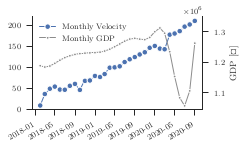

In [101]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_M.Velocity.loc[dates_full], marker='o', color='C0')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
# sns.lineplot(data=df_ts_M.GDP_naive.loc[dates_full], ax=ax2, marker='.', color='C1')
sns.lineplot(data=df_ts_M.GDP.loc[dates_full], ax=ax2, marker='.', color='C7')
ax2.set_ylabel(r'GDP [\textcurrency]')
ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Monthly Velocity"]+["Monthly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_velocity_GDP_monthly.pgf", backend='pgf', dpi=600)
fig

https://columbiaeconomics.com/2010/01/20/how-economists-convert-quarterly-data-into-monthly-cubic-spline-interpolation/comment-page-1/

In [92]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_prior, X_var]
y = df_ts_M.Velocity[dates_prior]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     347.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           5.73e-15
Time:                        09:05:28   Log-Likelihood:                -92.223
No. Observations:                  24   AIC:                             188.4
Df Residuals:                      22   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1302.7861     74.077    -17.587      0.000   -1447.975   -1157.597
GDP            0.0011      6e-05     18.648      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.045
Skew:                          -0.056   Prob(JB):                        0.978
Kurtosis:                       2.820   Cond. No.                     4.76e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 4.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_full, X_var]
y = df_ts_M.Velocity[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2179
Date:                Fri, 05 Mar 2021   Prob (F-statistic):              0.644
Time:                        09:05:28   Log-Likelihood:                -173.21
No. Observations:                  32   AIC:                             350.4
Df Residuals:                      30   BIC:                             353.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        245.5919    313.593      0.783      0.434    -369.039     860.222
GDP           -0.0001      0.000     -0.467      0.641      -0.001       0.000
==============================================================================
Omnibus:                        4.119   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                1.648
Skew:                           0.075   Prob(JB):                        0.439
Kurtosis:                       1.898   Cond. No.                     2.56e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 2.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
X = df_ts_M.loc[dates_full, X_var]
y = df_ts_M.Velocity[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(0,len(X))
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     50.30
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           3.73e-10
Time:                        09:05:28   Log-Likelihood:                -147.71
No. Observations:                  32   AIC:                             301.4
Df Residuals:                      29   BIC:                             305.8
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -692.1006    277.892     -2.491      0.013   -1236.758    -147.443
GDP            0.0006      0.000      2.833      0.005       0.000       0.001
Stringency     2.1844      0.342      6.392      0.000       1.515       2.854
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.375
Skew:                          -0.261   Prob(JB):                        0.829
Kurtosis:                       3.093   Cond. No.                     3.49e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 3.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
dates = slice('2018-03-31','2020-09-30')
X = df_ts_Q.loc[dates, X_var]
y = df_ts_Q.Velocity[dates]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':4})
X_all = df_ts_Q.loc[dates, X_var]
X_all.Stringency = 0.0
X_all = sm.add_constant(X_all)
# X_all['trend'] = range(1,len(X)+1)
predictions = model.predict(X_all) # make the predictions by the model
# Print out the statistics
model.summary()

/home/tvanzyl/anaconda3/envs/mintpy/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     44.58
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.60e-05
Time:                        09:05:28   Log-Likelihood:                -49.338
No. Observations:                  11   AIC:                             104.7
Df Residuals:                       8   BIC:                             105.9
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -621.5226    224.208     -2.772      0.006   -1060.963    -182.082
GDP            0.0006      0.000      3.211      0.001       0.000       0.001
Stringency     1.9779      0.272      7.261      0.000       1.444       2.512
==============================================================================
Omnibus:                        0.987   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.654
Skew:                           0.090   Prob(JB):                        0.721
Kurtosis:                       1.819   Cond. No.                     3.11e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
[2] The condition number is large, 3.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
df_ts_Q["Prediction"] = predictions
df_ts_Q["Residual_Velocity"] = (df_ts_Q.Velocity-df_ts_Q.Prediction)

In [97]:
df_ts_Q.loc['20180101':'20191231',['Velocity','Adj_Displacement','Acceleration','GDP','Residual_Velocity']].corr()

,Velocity,Adj_Displacement,Acceleration,GDP,Residual_Velocity
Velocity,1.000000,0.999853,0.650696,0.975756,0.979187
Adj_Displacement,0.999853,1.000000,0.649272,0.976636,0.978092
Acceleration,0.650696,0.649272,1.000000,0.577477,0.687902
GDP,0.975756,0.976636,0.577477,1.000000,0.911026
Residual_Velocity,0.979187,0.978092,0.687902,0.911026,1.000000


In [98]:
df_ts_Q.loc['20180101':'20200930',['Velocity','Adj_Displacement','Acceleration','GDP','Residual_Velocity','Stringency']].corr()

,Velocity,Adj_Displacement,Acceleration,GDP,Residual_Velocity,Stringency
Velocity,1.000000,0.999905,0.595858,0.060178,0.859172,0.775005
Adj_Displacement,0.999905,1.000000,0.593666,0.066012,0.856096,0.773146
Acceleration,0.595858,0.593666,1.000000,-0.569862,0.784138,0.652343
GDP,0.060178,0.066012,-0.569862,1.000000,-0.459057,-0.488313
Residual_Velocity,0.859172,0.856096,0.784138,-0.459057,1.000000,0.940087
Stringency,0.775005,0.773146,0.652343,-0.488313,0.940087,1.000000


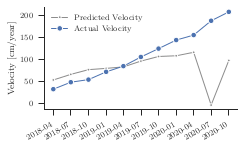

In [99]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=df_ts_Q.Prediction, marker='.', color='C7')
sns.lineplot(data=df_ts_Q.Velocity.loc[dates], marker='o', color='C0', ax=ax)
ax.set_ylabel(r'Velocity [cm/year]')
plt.legend(["Predicted Velocity","Actual Velocity"], loc='upper left')
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_predicted_velocity.pgf", backend='pgf', dpi=600)
fig